# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:15+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity           current             voltage             current  \
type                      armonic22 armonic38 armonic20 armonic41  armonic5   
2023-03-07 11:10:40+01:00  0.002323  0.000864  0.009649  0.017857  0.041560   
2023-03-07 11:10:50+01:00  0.002430  0.001033  0.008181  0.017296  0.042305   
2023-03-07 11:11:00+01:00  0.004122  0.003259  0.008085  0.015219  0.135011   
2023-03-07 11:11:10+01:00  0.003221  0.003635  0.011471  0.017656  0.811782   
2023-03-07 11:11:20+01:00  0.002145  0.003721  0.011074  0.018578  0.815488   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.006746  0.005590  0.010347  0.023693  0.829531   
2023-03-07 13:11:40+01:00  0.004638  0.003060  0.010428  0.019345  0.395718   
2023-03-07 13:11:50+01:00  0.002699  0.001378  0.008881  0.014348  0.039302   
2023-03-07 13:12:00+01:00  0.002603  0.001414  0.008856  0.013468  0.038769   
2023-03-07 13:12:10+01:00  0.002462  0.001071  0.010397  0.009315  0.036522   

physical_quantity             power             voltage             current  \
type                      armonic29 armonic39 armonic39 armonic31 armonic28   
2023-03-07 11:10:40+01:00 -0.000569 -0.000114  0.024861  0.058816  0.001401   
2023-03-07 11:10:50+01:00 -0.000631 -0.000133  0.026034  0.064693  0.001619   
2023-03-07 11:11:00+01:00 -0.000545 -0.000106  0.025883  0.066497  0.003216   
2023-03-07 11:11:10+01:00 -0.000242 -0.000034  0.020207  0.059405  0.006516   
2023-03-07 11:11:20+01:00 -0.000124  0.000024  0.020607  0.060801  0.005725   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:11:30+01:00 -0.000138  0.000009  0.011200  0.034009  0.006204   
2023-03-07 13:11:40+01:00 -0.000182 -0.000012  0.014781  0.027838  0.004117   
2023-03-07 13:11:50+01:00 -0.000169 -0.000054  0.016493  0.020737  0.002058   
2023-03-07 13:12:00+01:00 -0.000157 -0.000030  0.015210  0.020803  0.002189   
2023-03-07 13:12:10+01:00 -0.000204 -0.000015  0.024096  0.023382  0.002002   

physical_quantity          ...                   power   current            \
type                       ... armonic49     armonic48 armonic21 armonic24   
2023-03-07 11:10:40+01:00  ...  0.001987  9.600001e-07  0.010198  0.001944   
2023-03-07 11:10:50+01:00  ...  0.002253  1.120000e-06  0.011012  0.002077   
2023-03-07 11:11:00+01:00  ...  0.002869  3.600000e-07  0.014404  0.004094   
2023-03-07 11:11:10+01:00  ...  0.004901 -1.140000e-06  0.022425  0.005346   
2023-03-07 11:11:20+01:00  ...  0.005436 -2.520000e-06  0.021484  0.005684   
...                        ...       ...           ...       ...       ...   
2023-03-07 13:11:30+01:00  ...  0.003147 -1.186000e-05  0.042138  0.005640   
2023-03-07 13:11:40+01:00  ...  0.003338 -8.000007e-08  0.029779  0.004307   
2023-03-07 13:11:50+01:00  ...  0.003810  2.440000e-06  0.018397  0.002497   
2023-03-07 13:12:00+01:00  ...  0.003653  1.040000e-06  0.017793  0.002437   
2023-03-07 13:12:10+01:00  ...  0.004180  1.550000e-06  0.017953  0.002296   

physical_quantity                     voltage     power                      \
type                      armonic33 armonic37 armonic23 armonic28 armonic42   
2023-03-07 11:10:40+01:00  0.004385  0.078356  0.000258  0.000003  0.000002   
2023-03-07 11:10:50+01:00  0.004399  0.080227  0.000268  0.000003  0.000002   
2023-03-07 11:11:00+01:00  0.007557  0.079556  0.000311  0.000011  0.000012   
2023-03-07 11:11:10+01:00  0.011318  0.073162 -0.000385 -0.000030 -0.000004   
2023-03-07 11:11:20+01:00  0.013516  0.077046 -0.000571 -0.000016 -0.000011   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.001374  0.058567 -0.000047 -0.000025 -0.000017   
2023-03-07 13:11:40+01:00  0.005693  0.060336 -0.000112 -0.000011 -0.000017   
2023-03-07 13:11:50+01:00  0.009610  0.065579 -0.000165 -0.000004  0.000003   
2023-03-07 13:12:00+01:00  0.009488  0.065839 -0.000256  0.0

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:15+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           current             voltage             current  \
type                      armonic22 armonic38 armonic20 armonic41  armonic5   
2023-03-07 11:10:40+01:00  0.001839  0.000804  0.016549  0.018796  0.042206   
2023-03-07 11:10:50+01:00  0.002296  0.000696  0.010779  0.018178  0.040893   
2023-03-07 11:11:00+01:00  0.002493  0.000990  0.007964  0.013351  0.042310   
2023-03-07 11:11:10+01:00  0.003990  0.002316  0.008841  0.016183  0.733537   
2023-03-07 11:11:20+01:00  0.002139  0.003578  0.010568  0.019338  0.814518   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.006895  0.005870  0.010174  0.023008  0.833341   
2023-03-07 13:11:40+01:00  0.006765  0.005341  0.016383  0.026823  0.831071   
2023-03-07 13:11:50+01:00  0.002724  0.001655  0.009448  0.014781  0.041062   
2023-03-07 13:12:00+01:00  0.002127  0.001875  0.009954  0.012444  0.037846   
2023-03-07 13:12:10+01:00  0.002786  0.000967  0.011755  0.010422  0.036193   

physical_quantity             power             voltage             current  \
type                      armonic29 armonic39 armonic39 armonic31 armonic28   
2023-03-07 11:10:40+01:00 -0.000555 -0.000125  0.028755  0.061069  0.001213   
2023-03-07 11:10:50+01:00 -0.000592 -0.000140  0.029301  0.057884  0.001699   
2023-03-07 11:11:00+01:00 -0.000627 -0.000133  0.030315  0.069925  0.001582   
2023-03-07 11:11:10+01:00 -0.000571 -0.000119  0.020944  0.054170  0.004254   
2023-03-07 11:11:20+01:00 -0.000151 -0.000009  0.019577  0.058735  0.005679   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:11:30+01:00 -0.000117  0.000015  0.011834  0.031472  0.006587   
2023-03-07 13:11:40+01:00 -0.000107  0.000013  0.008195  0.027996  0.006581   
2023-03-07 13:11:50+01:00 -0.000176 -0.000066  0.014283  0.022692  0.001910   
2023-03-07 13:12:00+01:00 -0.000149 -0.000058  0.015737  0.017367  0.002196   
2023-03-07 13:12:10+01:00 -0.000063  0.000014  0.027125  0.021819  0.001793   

physical_quantity          ...                   power   current            \
type                       ... armonic49     armonic48 armonic21 armonic24   
2023-03-07 11:10:40+01:00  ...  0.002466  3.200000e-06  0.010537  0.001464   
2023-03-07 11:10:50+01:00  ...  0.002072  2.400000e-06  0.010527  0.002183   
2023-03-07 11:11:00+01:00  ...  0.002585  1.600000e-06  0.011149  0.002051   
2023-03-07 11:11:10+01:00  ...  0.003907  8.000001e-07  0.021314  0.004827   
2023-03-07 11:11:20+01:00  ...  0.005721  2.000000e-06  0.021122  0.005225   
...                        ...       ...           ...       ...       ...   
2023-03-07 13:11:30+01:00  ...  0.003049 -1.140000e-05  0.041824  0.006281   
2023-03-07 13:11:40+01:00  ...  0.002751 -5.200000e-06  0.041648  0.005709   
2023-03-07 13:11:50+01:00  ...  0.003308  2.200000e-06  0.019255  0.002409   
2023-03-07 13:12:00+01:00  ...  0.003728  4.200000e-06  0.017545  0.002139   
2023-03-07 13:12:10+01:00  ...  0.004029  6.000000e-07  0.017182  0.002318   

physical_quantity                     voltage     power            \
type                      armonic33 armonic37 armonic23 armonic28   
2023-03-07 11:10:40+01:00  0.004295  0.073230  0.000323  0.000004   
2023-03-07 11:10:50+01:00  0.004137  0.075315  0.000260  0.000005   
2023-03-07 11:11:00+01:00  0.005497  0.083594  0.000103  0.000008   
2023-03-07 11:11:10+01:00  0.010029  0.073803 -0.000040 -0.000022   
2023-03-07 11:11:20+01:00  0.013190  0.072685 -0.000509 -0.000016   
...                             ...       ...       ...       ...   
2023-03-07 13:11:30+01:00  0.001384  0.058094 -0.000030 -0.000037   
2023-03-07 13:11:40+01:00  0.001054  0.056908 -0.000032 -0.000020   
2023-03-07 13:11:50+01:00  0.009591  0.065688 -0.000184 -0.000007   
2023-03-07 13:12:00+01:00  0.009354  0.064669 -0.000291 -0.000002   
2023-03-07 13:12:10+01:00  0.009763  0.062477 -0.000254 -0.000001   

physical_quantity              

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

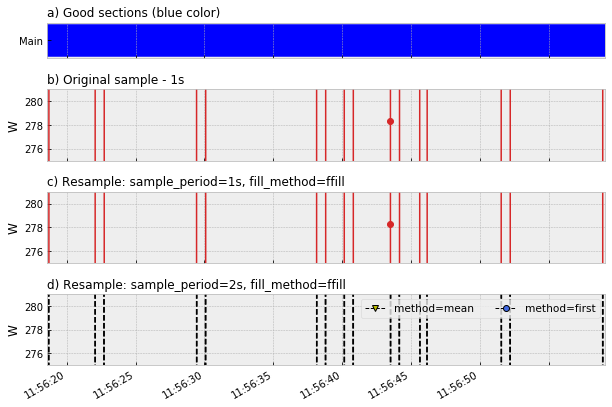

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 13:12:15+01:00' #tiempo final

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
#ax1.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
#ax2.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [9]:
train = DataSet('dsualmh.h5')

train.set_window(start="2023-03-07 11:10:38", end="2023-03-07 12:10:38")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 12:10:38+01:00', empty=False)

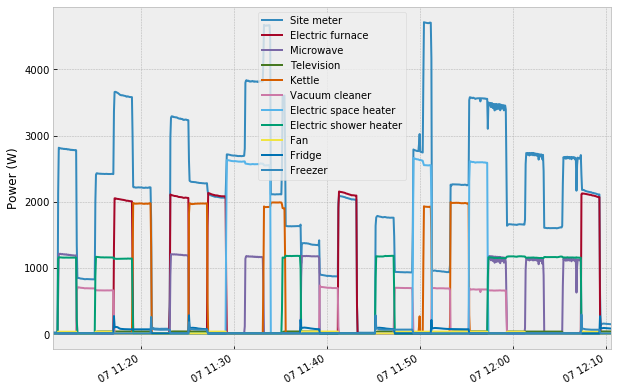

In [10]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [11]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2023-03-07 12:10:38", end="2023-03-07 12:41:26")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-03-07 12:10:38+01:00', end='2023-03-07 12:41:26+01:00', empty=False)

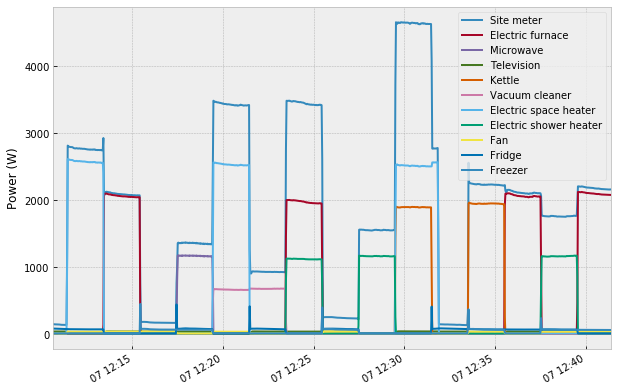

In [12]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [13]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2023-03-07 12:41:26", end="2023-03-07 13:12:15")

test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-03-07 12:41:26+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

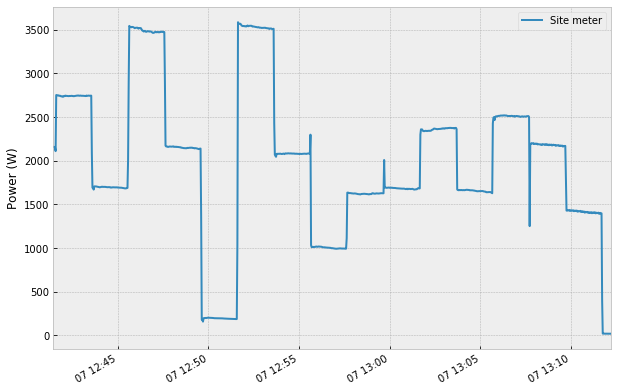

In [14]:
test_elec.mains().plot()